# PASSENGERS SURVIVE (TITANIC DATA) - EDA

Data source :
    https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv
##### Titanic Dataset
It is one of the most popular datasets used for understanding machine learning basics. It contains information of all the passengers aboard the RMS Titanic, which unfortunately was shipwrecked. This dataset can be used to predict whether a given passenger survived or not.

## Feature Description
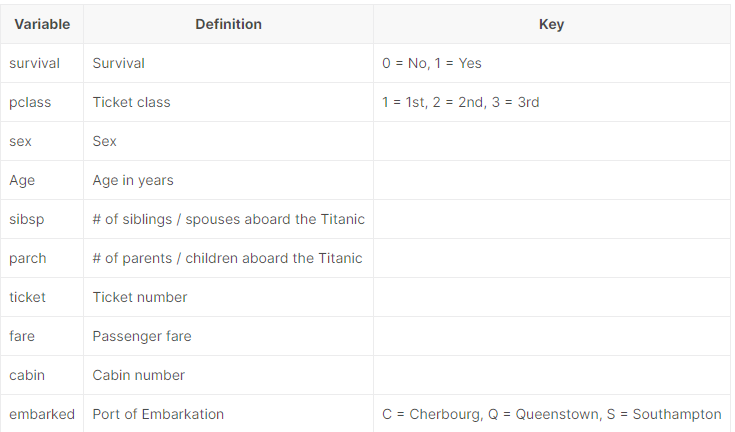

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Overview

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


# PREPROCESSING

In [6]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Drop null values from embarked

In [7]:
df = df[df['embarked'].notna()].reset_index(drop=True)

### Fill null values of age
See correlations between age and others variables.

In [8]:
df.corr()['age']

survived     -0.082446
pclass       -0.365902
age           1.000000
sibsp        -0.307351
parch        -0.187896
fare          0.093143
adult_male    0.286543
alone         0.195766
Name: age, dtype: float64

In [9]:
df.groupby(by='pclass')['age'].mean()

pclass
1    38.105543
2    29.877630
3    25.140620
Name: age, dtype: float64

In [10]:
df_null = df[df['age'].isna()]
df_not_null = df[df['age'].notna()]

In [11]:
age = []
for i in df_null['pclass']:
    if i == 1:
        age.append(38)
    elif i == 2:
        age.append(30)
    else:
        age.append(25)

In [12]:
df_null['age'] = age

C:\Users\brian\AppData\Local\Temp\ipykernel_16396\1546932454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null['age'] = age


In [13]:
df = pd.concat([df_not_null, df_null]).reset_index(drop=True)

### Drop Column Alive dan Deck

In [14]:
df = df.drop(columns=['alive','deck', 'adult_male', 'embarked', 'class'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   who          889 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        889 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.5+ KB


### Change data type survived with boolean

In [16]:
for index, value in enumerate(df['survived']):
    if value == 1:
        df['survived'][index] = True
    else:
        df['survived'][index] = False

C:\Users\brian\AppData\Local\Temp\ipykernel_16396\2252203043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['survived'][index] = False


In [17]:
df['survived'] = df['survived'].astype('bool')

### Change data type survived with boolean

In [18]:
df['pclass'] = df['pclass'].astype('str')

In [19]:
df = df.sort_values(by='age').reset_index(drop=True)

### Divide data categorical and numerical

In [20]:
df_num = df[['age','fare', 'sibsp', 'parch']]

In [21]:
df_cat = df[['survived', 'pclass', 'sex', 'embark_town', 'who', 'alone']]

# EDA

### A. Feature Target

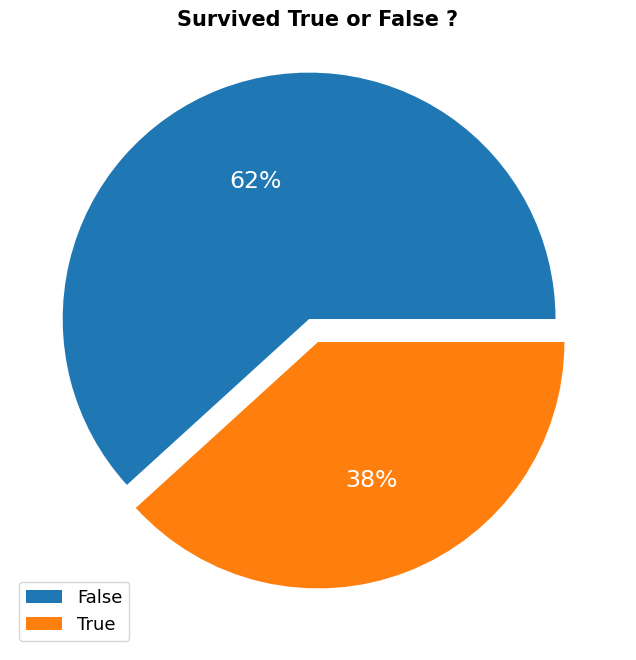

In [22]:
plt.figure(figsize = (12, 8))
plt.title('Survived True or False ?', size = 15, fontweight = 'bold')
labels = 'False', 'True'
plt.pie(df['survived'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))
plt.legend(labels, loc='lower left', fontsize = 13)
plt.show()

In [23]:
df['survived'].value_counts()

False    549
True     340
Name: survived, dtype: int64

> Based on the pie chart, it can be seen that the passengers on the Titanic ship had 38% of the samples of safe passengers, namely 340, and 62% of the samples of passengers who were not safe, which were 549.

### B. Numerical Features

<AxesSubplot:>

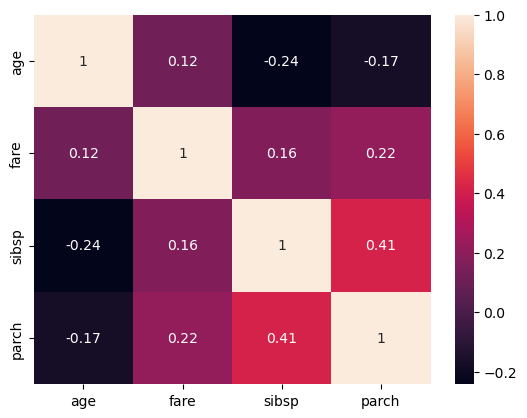

In [24]:
sns.heatmap(data=df_num.corr(), annot= True)

 ### Survived by Fare

C:\Users\brian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\brian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


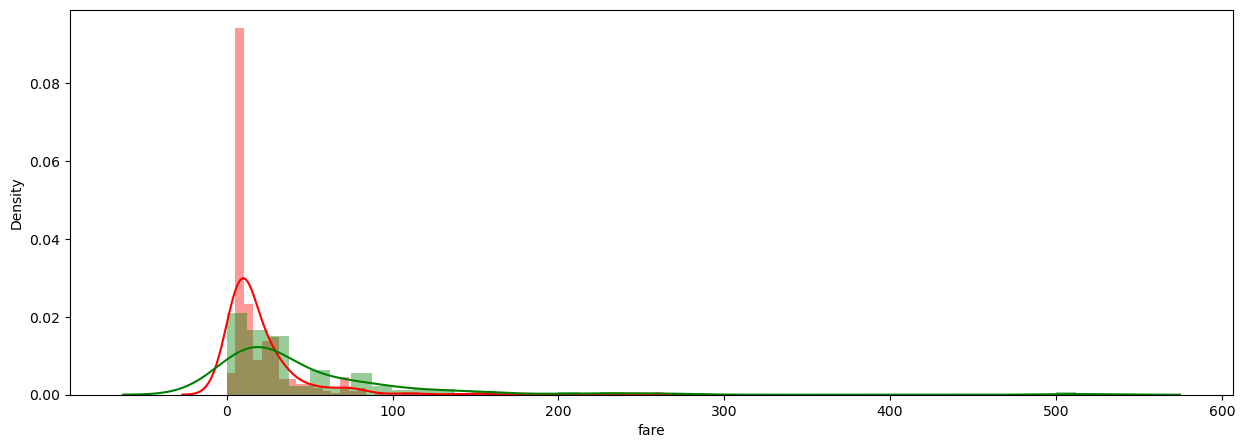

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df[(df['survived'] == False)]['fare'], color='red')
sns.distplot(df[(df['survived'] == True)]['fare'], color='green')
plt.show()
plt.savefig('fare')

> From the results of the segmented plot based on "fare", it can be seen that the data is positively skewed so that the tail of the data stretches to the right.
- The red output "alive=false" centered on the right-hand curve means that many passengers do not survive at low fares.
- Green output "alive=false" centered on the right-hand curve means that at low fares, many passengers do not survive.
- this makes sense, at low fares the facilities are less adequate than those at high rates so the chances of passengers not surviving are greater.

### Survived by Age

C:\Users\brian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\brian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


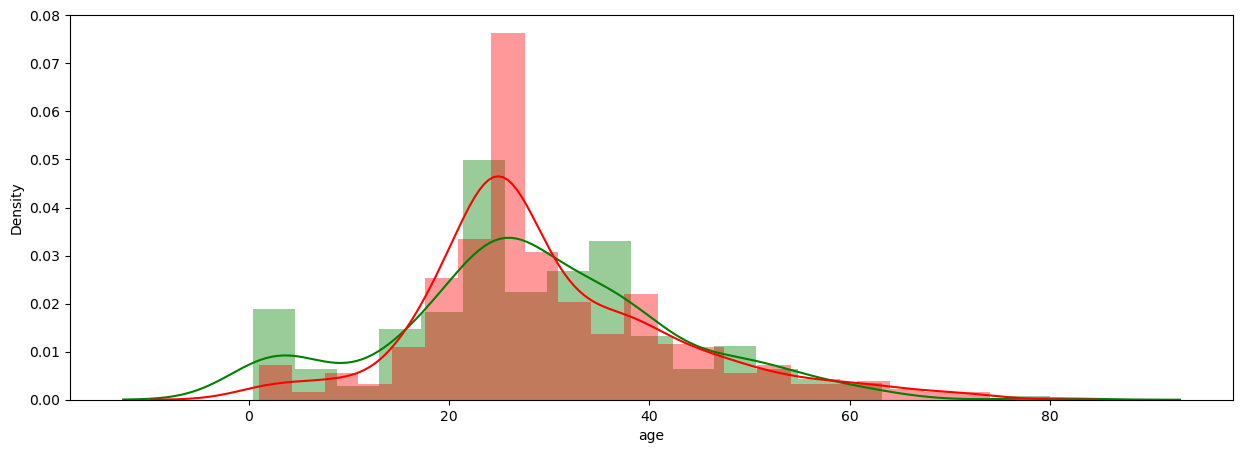

In [58]:
plt.figure(figsize=(15,5))
sns.distplot(df[(df['survived'] == True)]['age'], color='green')
sns.distplot(df[(df['survived'] == False)]['age'], color='red')

plt.show()

>  From the results of the segmented plot based on "age", it can be seen that the data is randomly distributed and the data center is in the middle so that the initial data can be assumed as normally distributed data.
- The red output "alive=false" ranges from the age of 0-78 years and the peak point of the red curve is at 24-28 years old, meaning that almost all age groups must have passengers who did not survive and most are aged 24-28 years
- The green output "alive=false" ranges from 0-65 years old and the top point of the red curve is at 24-28 years old, meaning that almost all age groups must have passengers who did not survive and most of them are 0-5 years old and 24-28.
- This is following the rescue procedure, that is, the children and the elderly are rescued first


### Survived by Sibsp

C:\Users\brian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\brian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


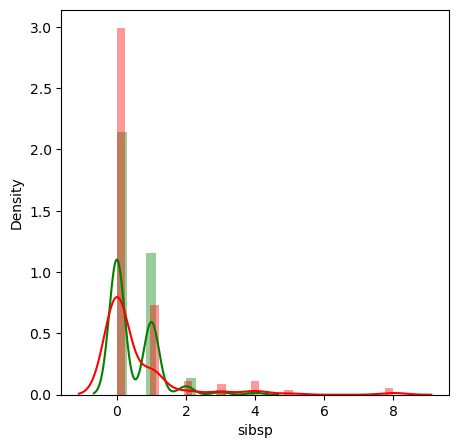

In [59]:
plt.figure(figsize=(5,5))
sns.distplot(df[(df['survived'] == True)]['sibsp'], color='green')
sns.distplot(df[(df['survived'] == False)]['sibsp'], color='red')
plt.show()

>  From the results of the segmented plot based on "sibsp", it can be seen that the data is positively skewed so that the tail of the data stretches to the right.
- The red output "alive=false" ranges from the number of siblings 0 to 6 and there are outliers in the number of siblings 8. The peak point of the red curve is at number 0, meaning that almost all age groups must have passengers who did not survive and most of them were passengers who The number of siblings on the ship is 0.
- The green output "alive=false" ranges from the number of siblings from 0 to 2 and there are no outliers. The peak point of the red curve is at number 0, meaning that at most there are passengers whose number of relatives on the ship is 0.


### Survived by Parch

C:\Users\brian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\brian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


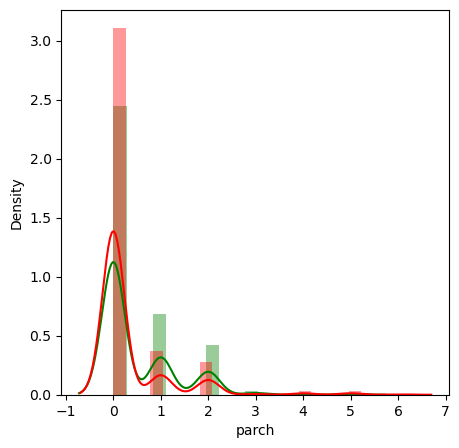

In [60]:
plt.figure(figsize=(5,5))
sns.distplot(df[(df['survived'] == True)]['parch'], color='green')
sns.distplot(df[(df['survived'] == False)]['parch'], color='red')
plt.show()

> From the results of the displot which is segmented based on "parch", it can be seen that the data is positively skewed so that the tail of the data stretches to the right.
- At parch = 0, that is, when the passenger is not with their parents, the red output "alive=false" is bigger than the green output "alive=true"
- At parch = 1, when the passenger is not with their parents, the red output "alive=false" is smaller than the green output "alive=true"
- At parch = 2, when the passenger is not with their parents, the red output "alive=false" is smaller than the green output "alive=true"
> it's means that the presence or absence of parents may affect the chances of a passenger surviving or not surviving.

### CONCLUSION:
> so we can conclude that fare, age, sibsp, and parch affect the chances of passengers surviving or not surviving.

### B. Categorical Feature

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    bool   
 1   pclass       889 non-null    object 
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   who          889 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(4)
memory usage: 57.4+ KB


### Survived by Who

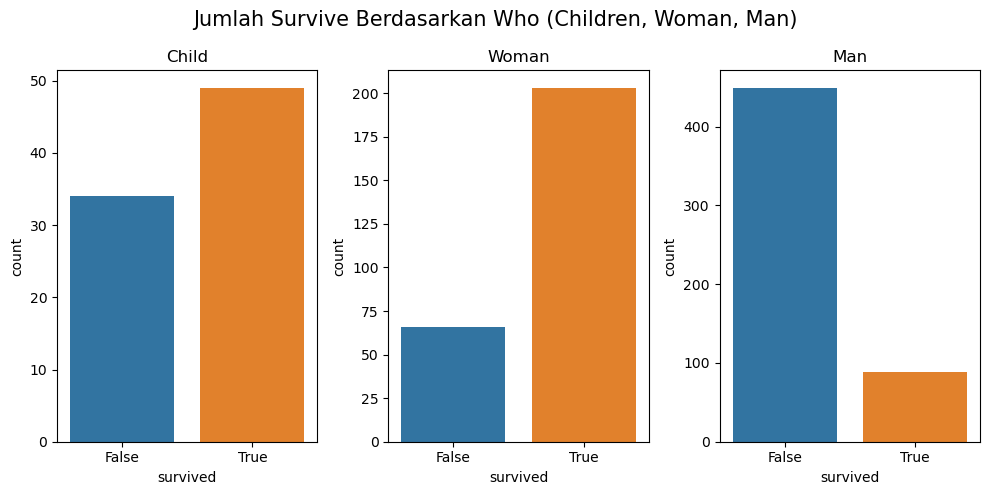

In [45]:
fig, axs = plt.subplots(1,3, figsize=(10,5))

plt.suptitle('Jumlah Survive Berdasarkan Who (Children, Woman, Man)', fontsize=15)

sns.countplot(ax=axs[0], data=df[df['who']=='child'], x='survived')
sns.countplot(ax=axs[1], data=df[df['who']=='woman'], x='survived')
sns.countplot(ax=axs[2], data=df[df['who']=='man'], x='survived')

axs[0].set_title('Child')
axs[1].set_title('Woman')
axs[2].set_title('Man')

plt.tight_layout()

> Based on the “Who” category Who is the passenger (Child, Woman, Man), it can be seen that
- The highest number of safe passengers is the child group
- The lowest number of survivors is the man group
- The highest number of unsafe passengers is the human group
- The lowest number of unsafe passengers is the woman's group
> From the results that children and women have a chance of surviving not less than men, it can be shown that the existence of a rescue priority procedure is likely to affect the chances of passengers surviving


### Survived by Pclass

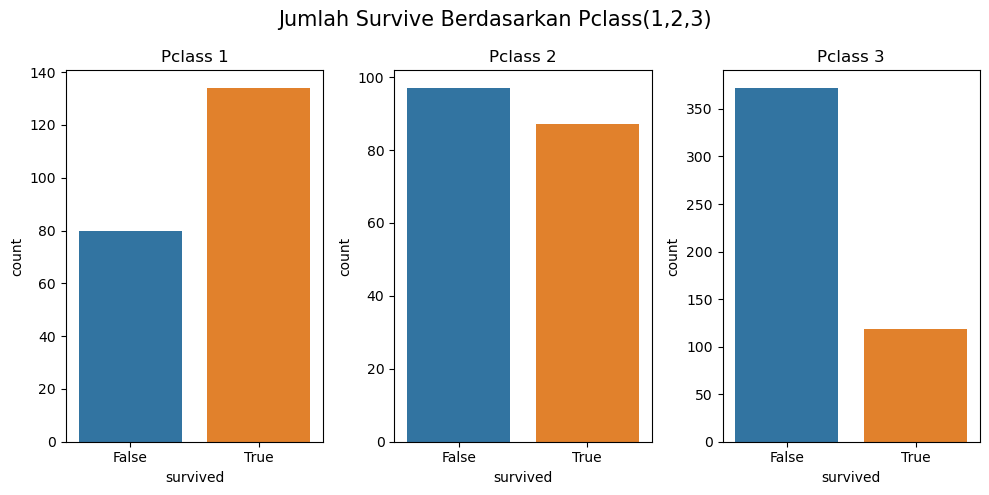

In [47]:
fig, axs = plt.subplots(1,3, figsize=(10,5))

plt.suptitle('Jumlah Survive Berdasarkan Pclass(1,2,3)', fontsize=15)

sns.countplot(ax=axs[0], data=df[df['pclass']=='1'], x='survived')
sns.countplot(ax=axs[1], data=df[df['pclass']=='2'], x='survived')
sns.countplot(ax=axs[2], data=df[df['pclass']=='3'], x='survived')

axs[0].set_title('Pclass 1')
axs[1].set_title('Pclass 2')
axs[2].set_title('Pclass 3')

plt.tight_layout()
plt.savefig('contoh')

> Based on the ticket class “Pclass” category (1,2,3), it can be seen that
- The highest number of safe passengers is the Pclass 1 group
- The lowest number of safe passengers is the Pclass 3 group
- The highest number of unsafe passengers is the Pclass 3 group
- The lowest number of unsafe passengers is the Pclass 1 group
> From the results, it can be shown that ticket classes that have different facilities may be low, so the facilities are inadequate compared to those with high fares so that the chances of passengers are safe.


### Survived by sex

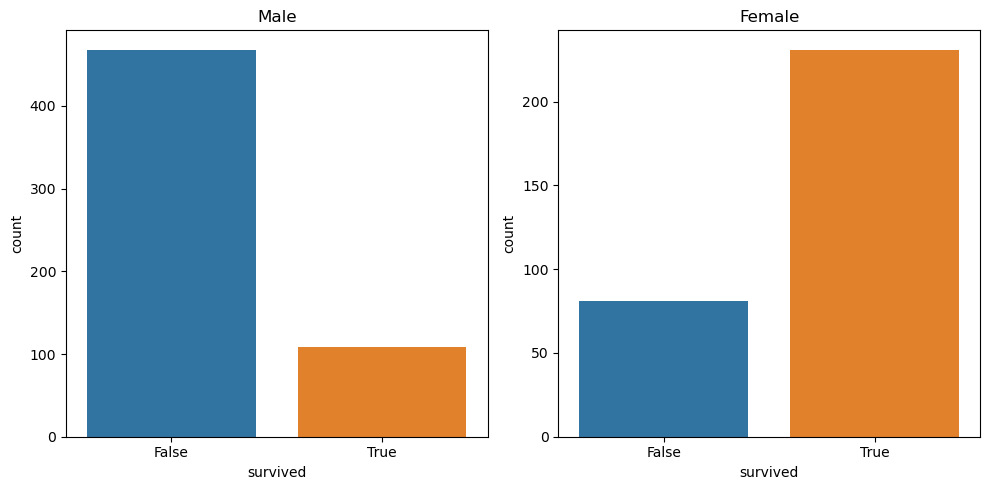

In [48]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

# plt.suptitle('Jumlah Survive Berdasarkan sex (male, female)', fontsize=15)

sns.countplot(ax=axs[0], data=df[df['sex']=='male'], x='survived')
sns.countplot(ax=axs[1], data=df[df['sex']=='female'], x='survived')


axs[0].set_title('Male')
axs[1].set_title('Female')

plt.tight_layout()

> Based on the category ”sex”  (male, female), it can be seen that
- The highest number of safe passengers is the female group
- The lowest number of safe passengers is the male group
- The highest number of unsafe passengers is the male group
- The lowest number of unsafe passengers is the female group
> From the results that women have a chance of surviving not less than men, it can be shown that the existence of a rescue priority procedure may affect the chances of passengers surviving


### Survived by embark_town

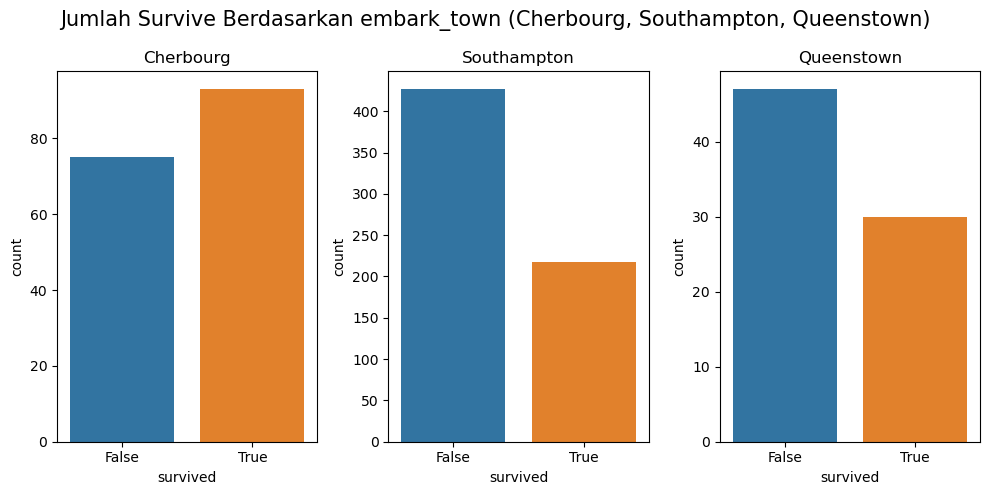

In [33]:
fig, axs = plt.subplots(1,3, figsize=(10,5))

plt.suptitle('Jumlah Survive Berdasarkan embark_town (Cherbourg, Southampton, Queenstown)', fontsize=15)

sns.countplot(ax=axs[0], data=df[df['embark_town']=='Cherbourg'], x='survived')
sns.countplot(ax=axs[1], data=df[df['embark_town']=='Southampton'], x='survived')
sns.countplot(ax=axs[2], data=df[df['embark_town']=='Queenstown'], x='survived')



axs[0].set_title('Cherbourg')
axs[1].set_title('Southampton')
axs[2].set_title('Queenstown')


plt.tight_layout()

> Based on the category of embark_town class (Cherbourg, Queenstown, Southampton), it can be seen that
- The highest number of safe passengers is the Southampton group
- The lowest number of survivors is the Queenstown group
- The highest number of unsafe passengers is the Southampton group
- The lowest number of unsafe passengers is the Queenstown group
> From the results Southampton had the highest chance of surviving and not surviving, Cherbourg had a medium chance of surviving and not surviving, and Queenstown had the lowest chance of surviving and not surviving. This does not indicate the possibility of a part of the embarkation effect because the output of each group has a chance of surviving and not surviving at the same level, so it does not show any pattern.


### Survived by embark_town

In [34]:
df.embark_town.unique()

array(['Cherbourg', 'Southampton', 'Queenstown'], dtype=object)

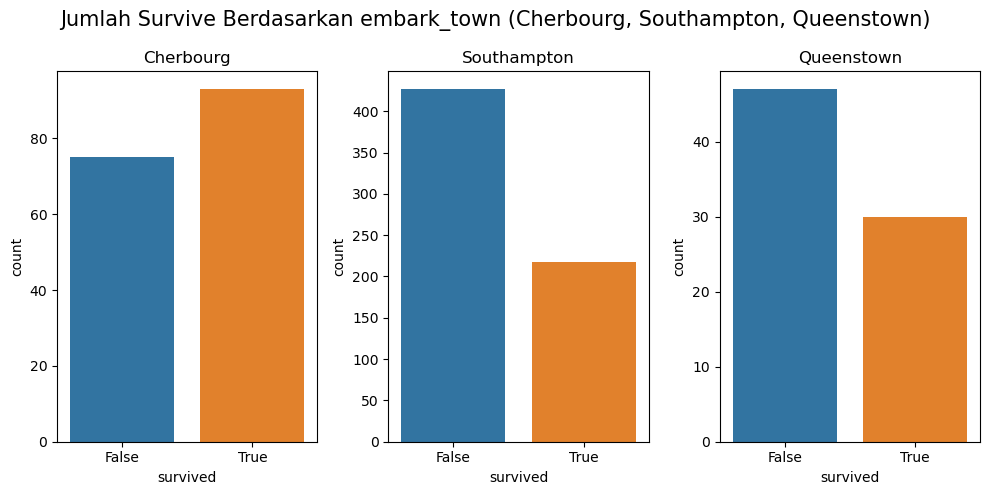

In [35]:
fig, axs = plt.subplots(1,3, figsize=(10,5))

plt.suptitle('Jumlah Survive Berdasarkan embark_town (Cherbourg, Southampton, Queenstown)', fontsize=15)

sns.countplot(ax=axs[0], data=df[df['embark_town']=='Cherbourg'], x='survived')
sns.countplot(ax=axs[1], data=df[df['embark_town']=='Southampton'], x='survived')
sns.countplot(ax=axs[2], data=df[df['embark_town']=='Queenstown'], x='survived')



axs[0].set_title('Cherbourg')
axs[1].set_title('Southampton')
axs[2].set_title('Queenstown')


plt.tight_layout()

> Based on the category of embark_town class (Cherbourg, Queenstown, Southampton), it can be seen that
- The highest number of safe passengers is the Southampton group
- The lowest number of survivors is the Queenstown group
- The highest number of unsafe passengers is the Southampton group
- The lowest number of unsafe passengers is the Queenstown group
> From the results Southampton had the highest chance of surviving and not surviving, Cherbourg had a medium chance of surviving and not surviving, and Queenstown had the lowest chance of surviving and not surviving. This does not indicate the possibility of a part of the embarkation effect because the output of each group has a chance of surviving and not surviving at the same level, so it does not show any pattern.


### Survived by alone

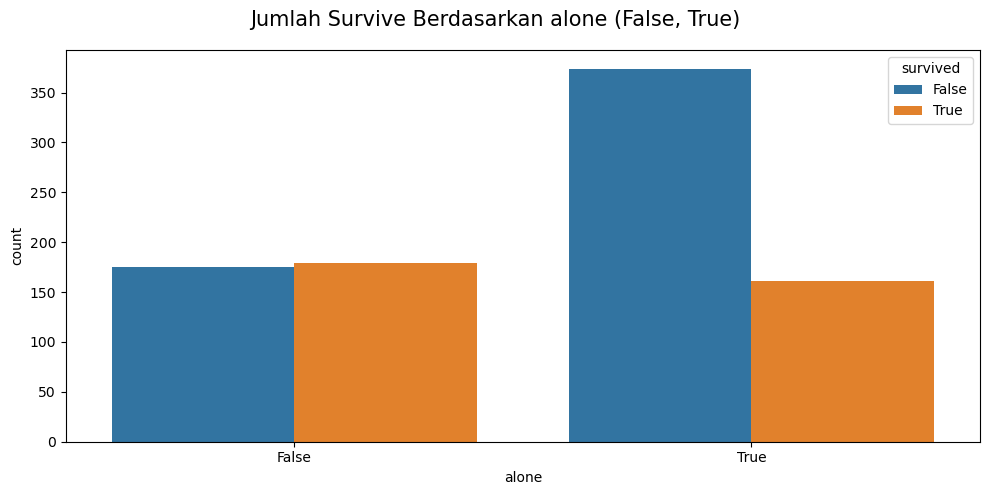

In [36]:
plt.figure(figsize=(10,5))

plt.suptitle('Jumlah Survive Berdasarkan alone (False, True)', fontsize=15)

sns.countplot(data=df, x='alone', hue='survived')


plt.tight_layout()

> Based on the “alone” category (True, False), it can be seen that
- The highest number of safe passengers is the group not alone
- The lowest number of survivors is the group itself
- The highest number of unsafe passengers is the group itself
- The lowest number of unsafe passengers is the non-alone group
> From the results that passengers who are not alone have no less chance of surviving than passengers who are alone.



# CONCLUSION:
> so we can conclude that variable  Who, Pclass, embark_town, and alone affect the chances of passengers surviving or not surviving.
> While the "age" feature does not show a significant comparison.

# SUMMARY

- Numerical variables: fare, age, sibsp, and parch affect the chances of passengers surviving or not surviving.

- Categorical variables: Who, Pclass, embark_town, and alone affect the probability of a passenger surviving or not surviving. While the "age" feature does not show a significant comparison.